In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:

insurance = pd.read_csv(r'new_insurance_data.csv')


In [3]:

insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
# label encoding on the sex and smoker column, and changing their data type to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['smoker'] = le.fit_transform(insurance['smoker'])
# changing the datatype of two column to integer
insurance['sex'] = insurance['sex'].astype(int)
insurance['smoker'] = insurance['smoker'].astype(int)

In [5]:

insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [6]:

insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   int32  
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   int32  
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:

# checking the column names in the data
insurance.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
insurance.shape


(1338, 13)

In [9]:
insurance.ndim

2

In [10]:
insurance.describe()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1338.000000,1335.000000,1333.000000,1338.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,0.505232,30.665112,1.090773,0.204783,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,0.500160,6.101690,1.201856,0.403694,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,0.000000,26.302500,0.000000,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

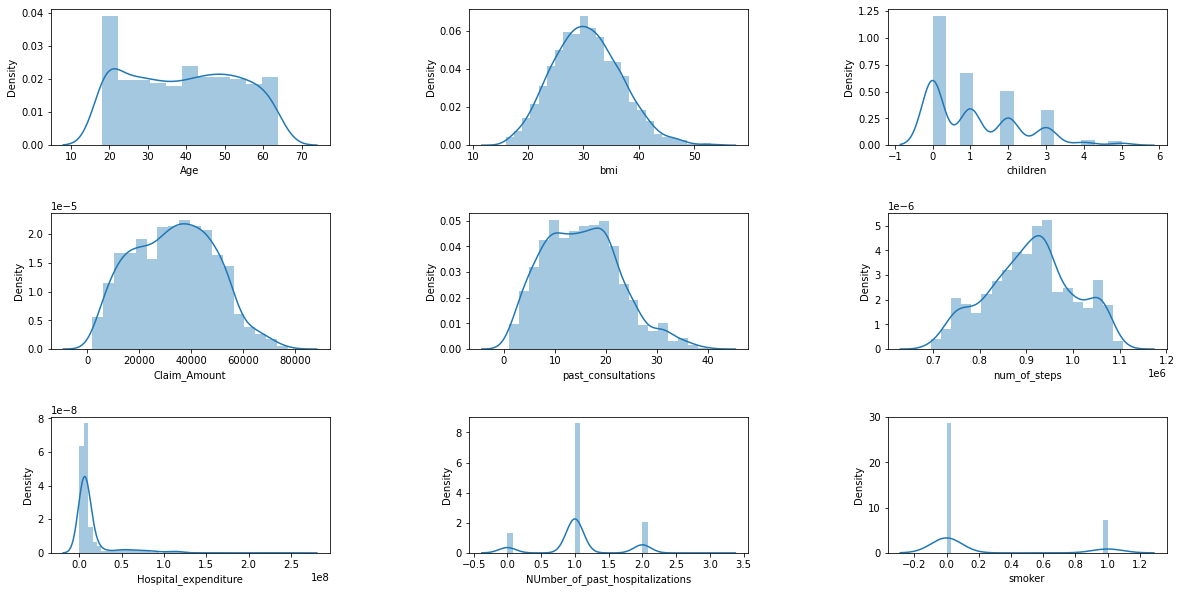

In [11]:
# We can plot the distribution plots for the columns to get more clarity on the distribution of the data.
ig, axes = plt.subplots(3,3,figsize=(20,10))
plt.subplot(3,3,1)
sns.distplot(x=insurance['age'])
plt.xlabel("Age")
plt.subplot(3,3,2)
sns.distplot(x=insurance['bmi'])
plt.xlabel("bmi")
plt.subplot(3,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel("children")
plt.subplot(3,3,4)
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel("Claim_Amount")
plt.subplot(3,3,5)
sns.distplot(x=insurance['past_consultations'])
plt.xlabel("past_consultations")
plt.subplot(3,3,6)
sns.distplot(x=insurance['num_of_steps'])
plt.xlabel("num_of_steps")
plt.subplot(3,3,7)
sns.distplot(x=insurance['Hospital_expenditure'])
plt.xlabel("Hospital_expenditure")
plt.subplot(3,3,8)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel("NUmber_of_past_hospitalizations")
plt.subplot(3,3,9)
sns.distplot(x=insurance['smoker'])
plt.xlabel("smoker")
warnings.filterwarnings("ignore")
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.show()


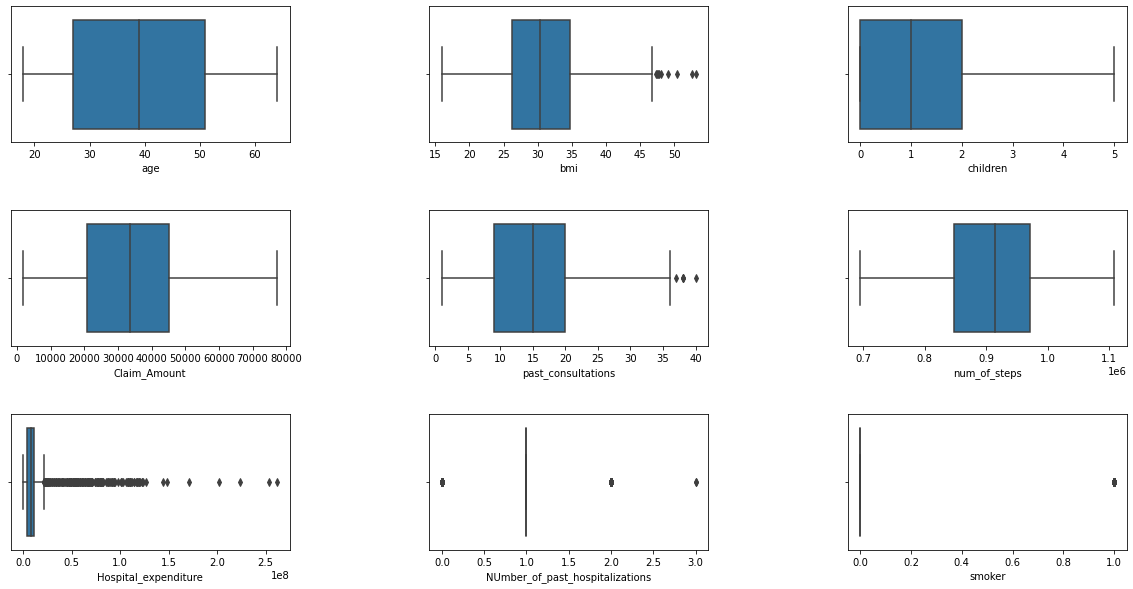

In [12]:
ig, axes = plt.subplots(3,3, figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x=insurance['age'])
plt.subplot(3,3,2)
sns.boxplot(x=insurance['bmi'])
plt.subplot(3,3,3)
sns.boxplot(x=insurance['children'])
plt.subplot(3,3,4)
sns.boxplot(x=insurance['Claim_Amount'])
plt.subplot(3,3,5)
sns.boxplot(x=insurance['past_consultations'])
plt.subplot(3,3,6)
sns.boxplot(x=insurance['num_of_steps'])
plt.subplot(3,3,7)
sns.boxplot(x=insurance['Hospital_expenditure'])
plt.subplot(3,3,8)
sns.boxplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.subplot(3,3,9)
sns.boxplot(x=insurance['smoker'])
plt.subplots_adjust(hspace = 0.5, wspace=0.5)
plt.show()


In [14]:

insurance.isna().sum()


age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [15]:
insurance['age'] = insurance['age'].fillna(insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(
 insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())


In [16]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [17]:

insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


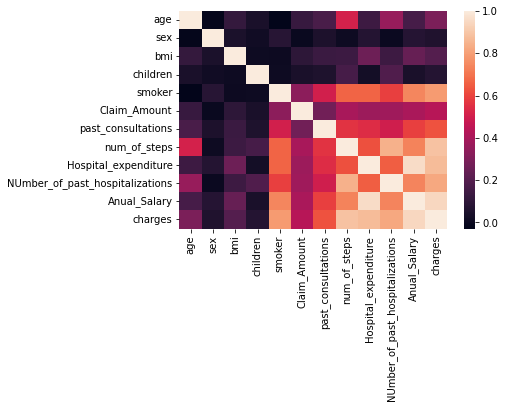

In [18]:
data=insurance.drop(['region'], axis = 1)
matrix = data.corr()
sns.heatmap(matrix)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
#splitting the data
X = insurance.drop(['charges','age', 'sex', 'bmi', 'children', 'region'], axis = 1)
y = insurance.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train


,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
560,0,29622.26103,6.0,886052.0,7.579867e+06,1.0,1.589946e+08
1285,1,66824.70947,23.0,1063413.0,8.042196e+07,2.0,1.919607e+09
1142,0,36320.75384,16.0,1001618.0,1.772151e+07,2.0,7.139574e+08
969,0,24827.43078,8.0,962113.0,1.214312e+07,1.0,2.928227e+08
486,0,47348.03370,10.0,888358.0,6.034962e+06,1.0,5.093163e+07
...,...,...,...,...,...,...,...
1095,0,47554.34106,19.0,1007896.0,1.132722e+07,1.0,5.662888e+08
1130,0,63672.07916,14.0,1000863.0,2.295519e+07,2.0,6.472972e+08
1294,1,42578.49702,24.0,1061168.0,9.188836e+07,2.0,2.038383e+09
860,0,27369.02461,22.0,943007.0,3.634140e+06,1.0,1.877743e+08


In [21]:
from sklearn.preprocessing import StandardScaler
# scaaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train


array([[-0.50874702, -0.24550745, -1.2335211 , ..., -0.29745518,
        -0.10122056, -0.36540273],
       [ 1.96561348,  2.14294016,  1.08058381, ...,  2.44746197,
         1.76612428,  2.78222091],
       [-0.50874702,  0.18454486,  0.12771708, ...,  0.08471359,
         1.76612428,  0.62675985],
       ...,
       [ 1.96561348,  0.58630046,  1.21670762, ...,  2.87955205,
         1.76612428,  2.99456786],
       [-0.50874702, -0.39016829,  0.94445999, ..., -0.44614248,
        -0.10122056, -0.31395035],
       [-0.50874702,  0.25290014,  1.48895526, ...,  0.01197612,
         1.76612428,  0.57733069]])

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# fitting the model
model.fit(X_train, y_train)
LinearRegression()


LinearRegression()

In [23]:

# making the prediction
predictions = model.predict(X_test)


In [24]:
from sklearn.metrics import r2_score
# r2_score
r2 = r2_score(y_test, predictions)
print("r2 score is: {}".format(r2))

r2 score is: 0.971007249445201


In [25]:
# adjusted r2 score
adj_r2 = 1-(1-r2)*len(y_train)/(len(y_test)-X_train.shape[1]-1)
print("adjusted r2 score is: {}".format(adj_r2))


adjusted r2 score is: 0.8806836804090964


In [26]:
from sklearn.metrics import *
rmse_on_test = mean_squared_error(y_test, predictions, squared = False)
print("Mean squared error on test data is : {}".format(rmse_on_test))

Mean squared error on test data is : 2152.8961180440338


In [27]:

train_predict = model.predict(X_train)
train_predict


array([ 8559.33728177, 43344.82264514, 22348.79601804, ...,
       44344.15023396, 12463.24632154, 23690.13376843])

In [28]:
rmse_on_train = mean_squared_error(y_train, train_predict, squared=False)
print("Mean squared error on train data is : {}".format(rmse_on_train))

Mean squared error on train data is : 1526.9983846830644


In [29]:
mape_on_train = mean_absolute_percentage_error(y_train, train_predict)
print("Mean absolute percentage error on tarin data is :{}".format(mape_on_train))

Mean absolute percentage error on tarin data is :0.18450621456317923


In [30]:
mape_on_test = mean_absolute_percentage_error(y_test, predictions)
print("Mean absolute percentage error on tarin data is :{}".format(mape_on_test))


Mean absolute percentage error on tarin data is :0.14947107277533153


In [31]:
error_pred = pd.DataFrame(columns=['Actual_data','Prediction_data'])
error_pred['Actual_data'] = y_test
error_pred['Prediction_data'] = predictions
error_pred['Error'] = error_pred['Actual_data']-error_pred['Prediction_data']


In [32]:

error_pred.head()

,Actual_data,Prediction_data,Error
764,10928.84900,10732.075670,196.773330
887,12648.70340,11370.964876,1277.738524
890,12797.20962,11967.708103,829.501517
1293,44202.65360,43364.988159,837.665441
259,3925.75820,4472.219237,-546.461037


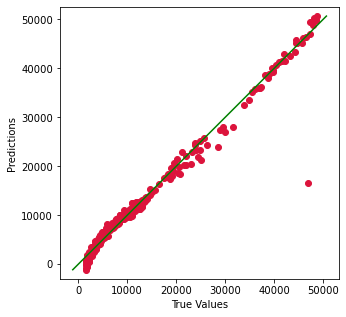

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')
p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1,p2], [p1,p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()